In [1]:
from sklearn.datasets import  load_digits
import matplotlib.pyplot as plt
import umap
import numpy as np



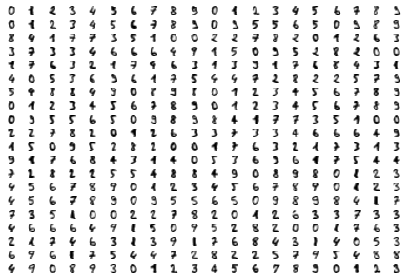

In [2]:
digits = load_digits()

fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [3]:
#reduce dimentionality with umap

reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)

embedding = reducer.transform(digits.data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(1797, 2)

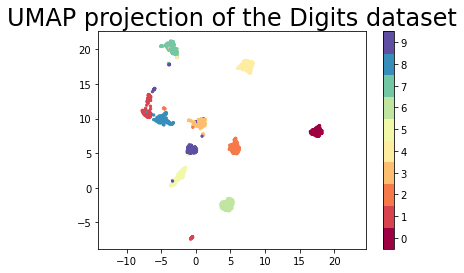

In [5]:

#plot embedding
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [6]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):

    #reduce dimentionality with umap
    reducer = umap.UMAP(a=1.576943460405378, angular_rp_forest=False,
       b=0.8950608781227859, init='spectral',
       local_connectivity=1.0, metric=metric, metric_kwds={},
       min_dist=min_dist, n_components=n_components, n_epochs=None, n_neighbors=n_neighbors,
       negative_sample_rate=5, random_state=42, set_op_mix_ratio=1.0,
       spread=1.0, target_metric='categorical', target_metric_kwds={},
       transform_queue_size=4.0, transform_seed=42, verbose=False)

    reducer.fit(digits.data)

    #find a low dimensional representation of the data
    #embedding is a 2-dimensional representation of the data.

    embedding = reducer.transform(digits.data)
    # Verify that the result of calling transform is
    # idenitical to accessing the embedding_ attribute
    assert(np.all(embedding == reducer.embedding_))
    print(embedding.shape)

    
    #plot embedding    
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        plt.scatter(embedding[:,0], range(embedding.shape[0]), c=digits.target, cmap='Spectral')
    if n_components == 2:
        ax = fig.add_subplot(111)
        plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
        plt.gca().set_aspect('equal', 'datalim')
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        plt.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2],c=digits.target, cmap='Spectral')
    plt.title(title, fontsize=12)
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title(title, fontsize=24);

/home/giotza01/.local/share/virtualenvs/umap_test-KRfC8oH4/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


(1797, 2)
(1797, 2)
(1797, 2)
(1797, 2)


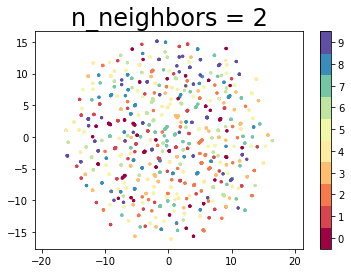

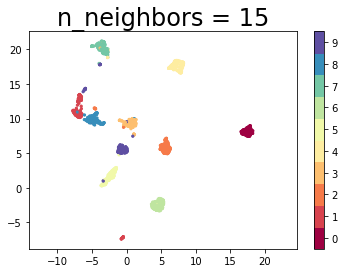

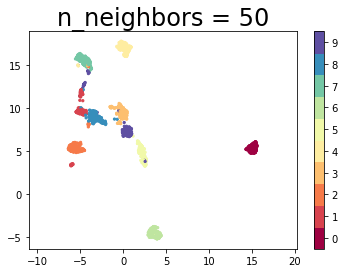

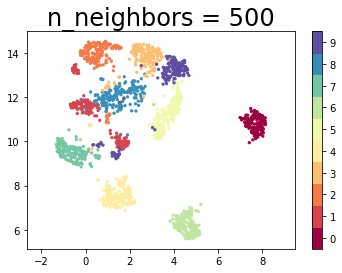

In [7]:
#parameter n_neighbors controls how UMAP balances local versus global structure in the data
for n in (2, 15, 50, 500):
    draw_umap(n_neighbors=n, min_dist=0.1, n_components=2, metric='euclidean', title='n_neighbors = {}'.format(n))


(1797, 2)
(1797, 2)
(1797, 2)


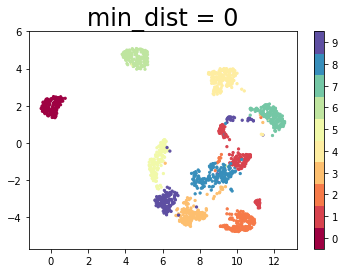

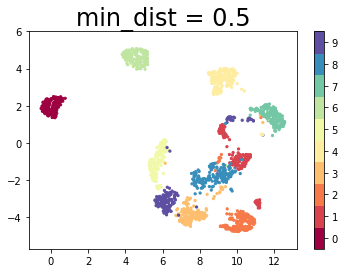

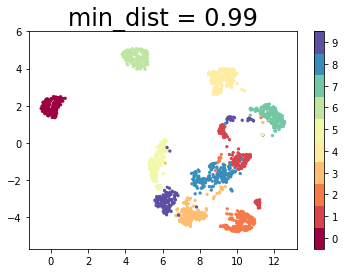

In [8]:
#The min_dist parameter controls how tightly UMAP is allowed to pack points together.
for d in ( 0, 0.5, 0.99):
    draw_umap(min_dist=d, n_neighbors=200, title='min_dist = {}'.format(d))

In [ ]:
#n_component the dimensionality of the reduced dimension space we will be embedding the data into

draw_umap(n_components=1, title='n_components = 1')
draw_umap(n_components=3, title='n_components = 3')
